# TA Review 4
*3/4/2024*

## FINM 37500 - 2024

### UChicago Financial Mathematics

* Burak Sekerci
* bsekerci@uchicago.edu

## Agenda

- Swaptions
- Volatility Modeling
- SABR
 <br>

In [3]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../cmds')
from binomial import *
from options import *

### Swaptions

#### First of all what is a Swap?

A (receiving fixed) swap is simply replicated as long a fixed bond and short a floating-rate bond.

Consider the following parameters:
* swap rate $K=.05$
* maturity $T=5$
* semiannual compounding and frequency

### Arrears
Note that the swap is like the caps and floors in that the payments are based on the previous period's interest rate.

That is, the payoff at time period $i$ is
$$C_{i+1} = N\Delta_t(r_{n,i}-K)$$
where 
* $C_{i+1}$ is the cashflow at period $i+1$ 
* $r_{n,i}$ is the n-frequency compounded rate at period $i$.
* $K$ is the swap rate

The first step in valuing a swaption, which is an option on a swap is to value the swap frist using the BDT tree. 

 - Grab your interest rate tree
     - Be careful, the timesteps of the interest tree has to match the swap payment schedule!
 - Utilize the payoff function as shown above and calculate the cashflows 
 - Do not forget to discount the final cashflow like caps since payments are in arrears!
 - Calculate the value of the swap through the tree. 
 - Example from class:

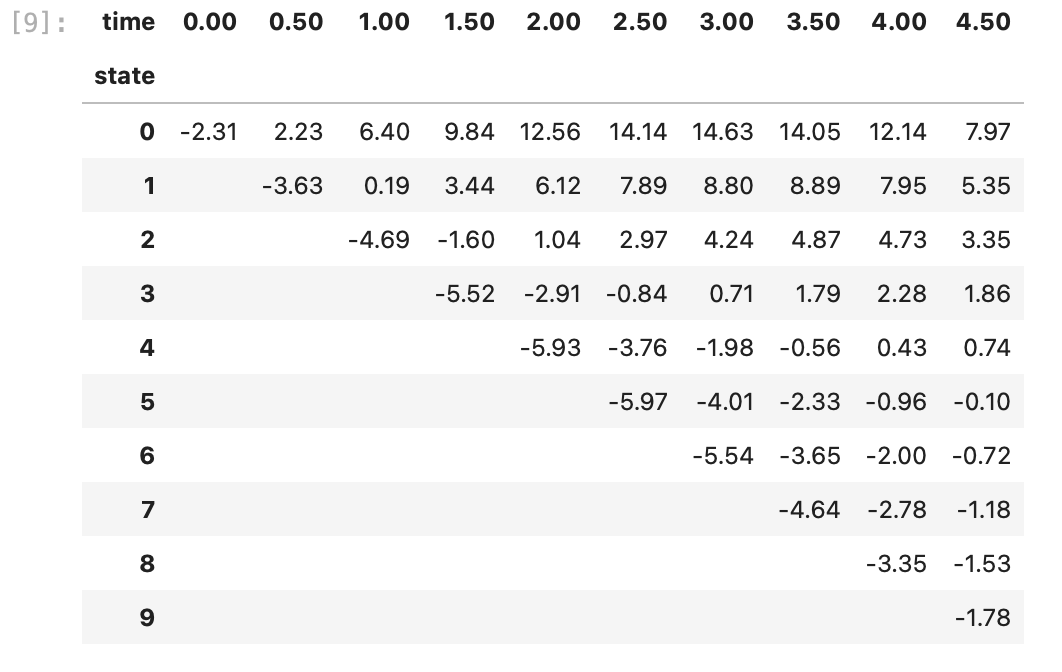

 - This swap has negative value today. 
 - It had a 0 value upon inception.
 - This means that the interest rates have moved lower, thus making the swap value negative for the payer (since we are pricing from that perspective)

#### Now what is a swaption?

A **receiver swaption** is 
* a contract today, (with a price paid today)
* for the option, not obligation,
* to enter into a swap **receiving** the swap rate, (set today, like a strike,)
* from $T_1$ to $T_2$.

Thus, the **receiver swaption** is like a **put** on a swap.

A **payer swaption** is the same thing, but the option is to enter into the swap, **paying** the swap rate (strike). Thus, it is like the **call** on a swap.

Note that we have three dates to consider: 
* the option expiration
* the swap start date
* the swap end date

A plain swaption sets the swap to start at the time the option expires.

Thus, a 2\% 1Y$\rightarrow$10Y denotes
* 2\% strike
* swaption with expiration of 1 year
* for a swap starting in 1 year and ending 10 years thereafter (in 11 years)

Suppose that the date of (underlying) swap beginning is **after** the swaption expires. 

This is a **midcurve** swaption.

Could have a 6m$\rightarrow$1Y$\rightarrow$5Y midcurve swaption:
* expires in 6 months
* underlying swap starts one year after that expiration (in 1.5 years from today)
* swap runs for 5 years, (until 6.5 years from today.)

Now an example on the same swap we valued above:

Consider a European 2Y$\rightarrow$ 3Y **payer** swaption with strike of $K=.05$\%.

 - This means that the swaption will expire in 2 years and the swap will begin at option expiration running for a year. 

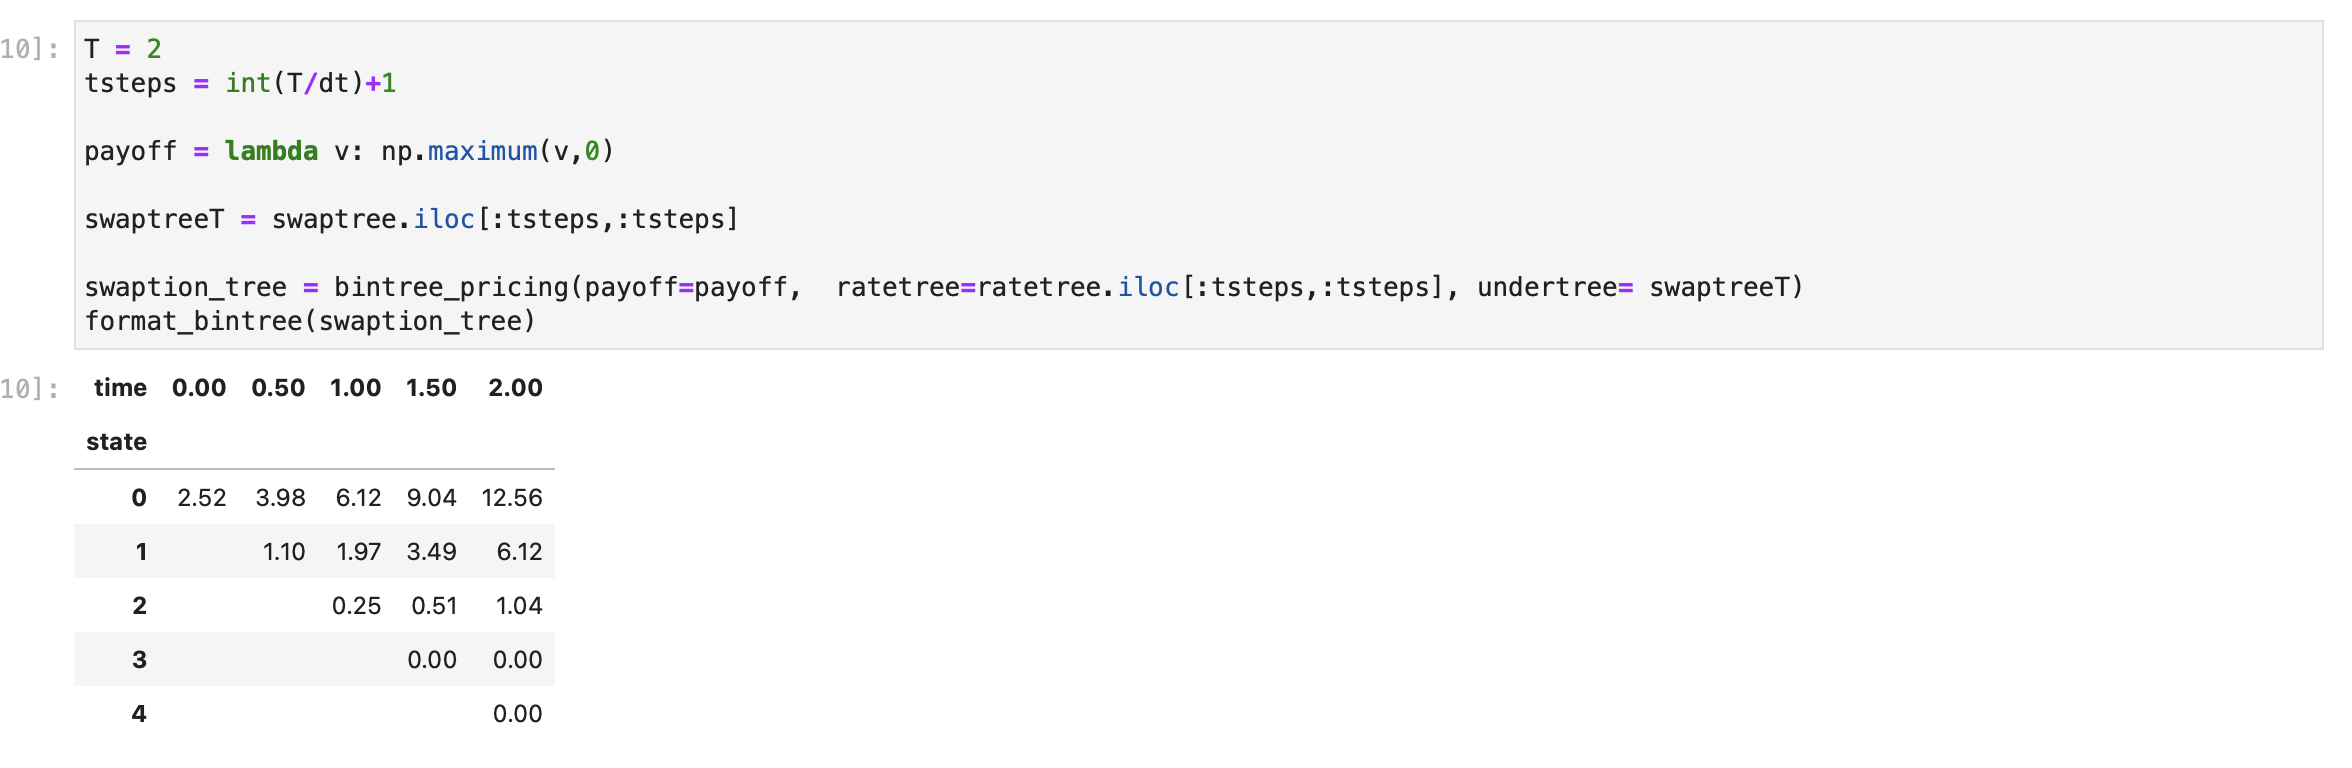

If this was american:

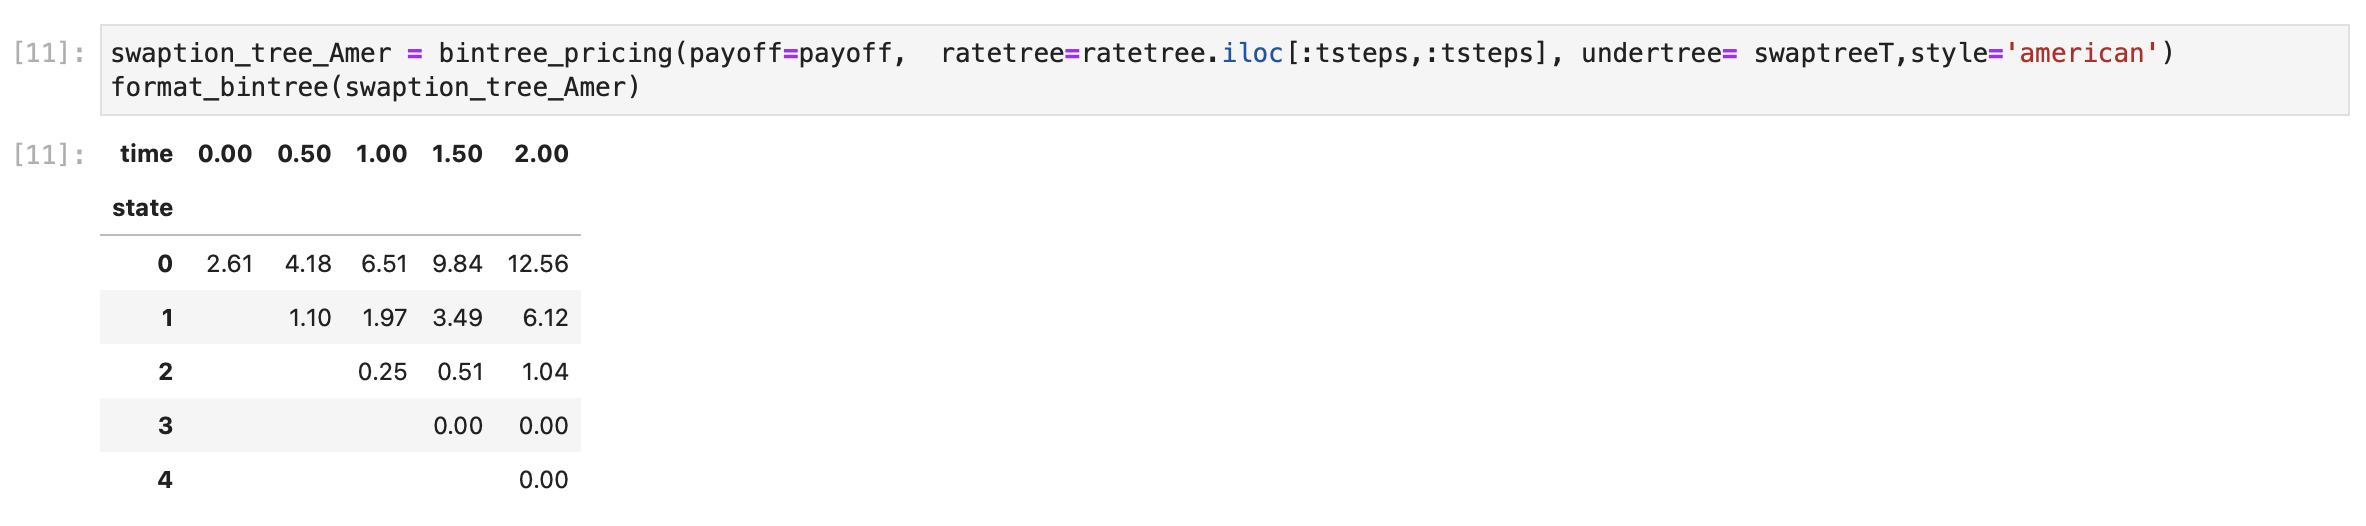

If this was a midcurve swaption, we would need to take out the cashflows that we won't be receiving from the tree and reprice the swap accordingly. 

### Volatility Modeling

## Motivation

As we have seen, 
* implied volatility is not constant for an underlying
* it varies substantially with **moneyness** (strike vs underlying) and time-to-expiration.
* and it is not stable over time!


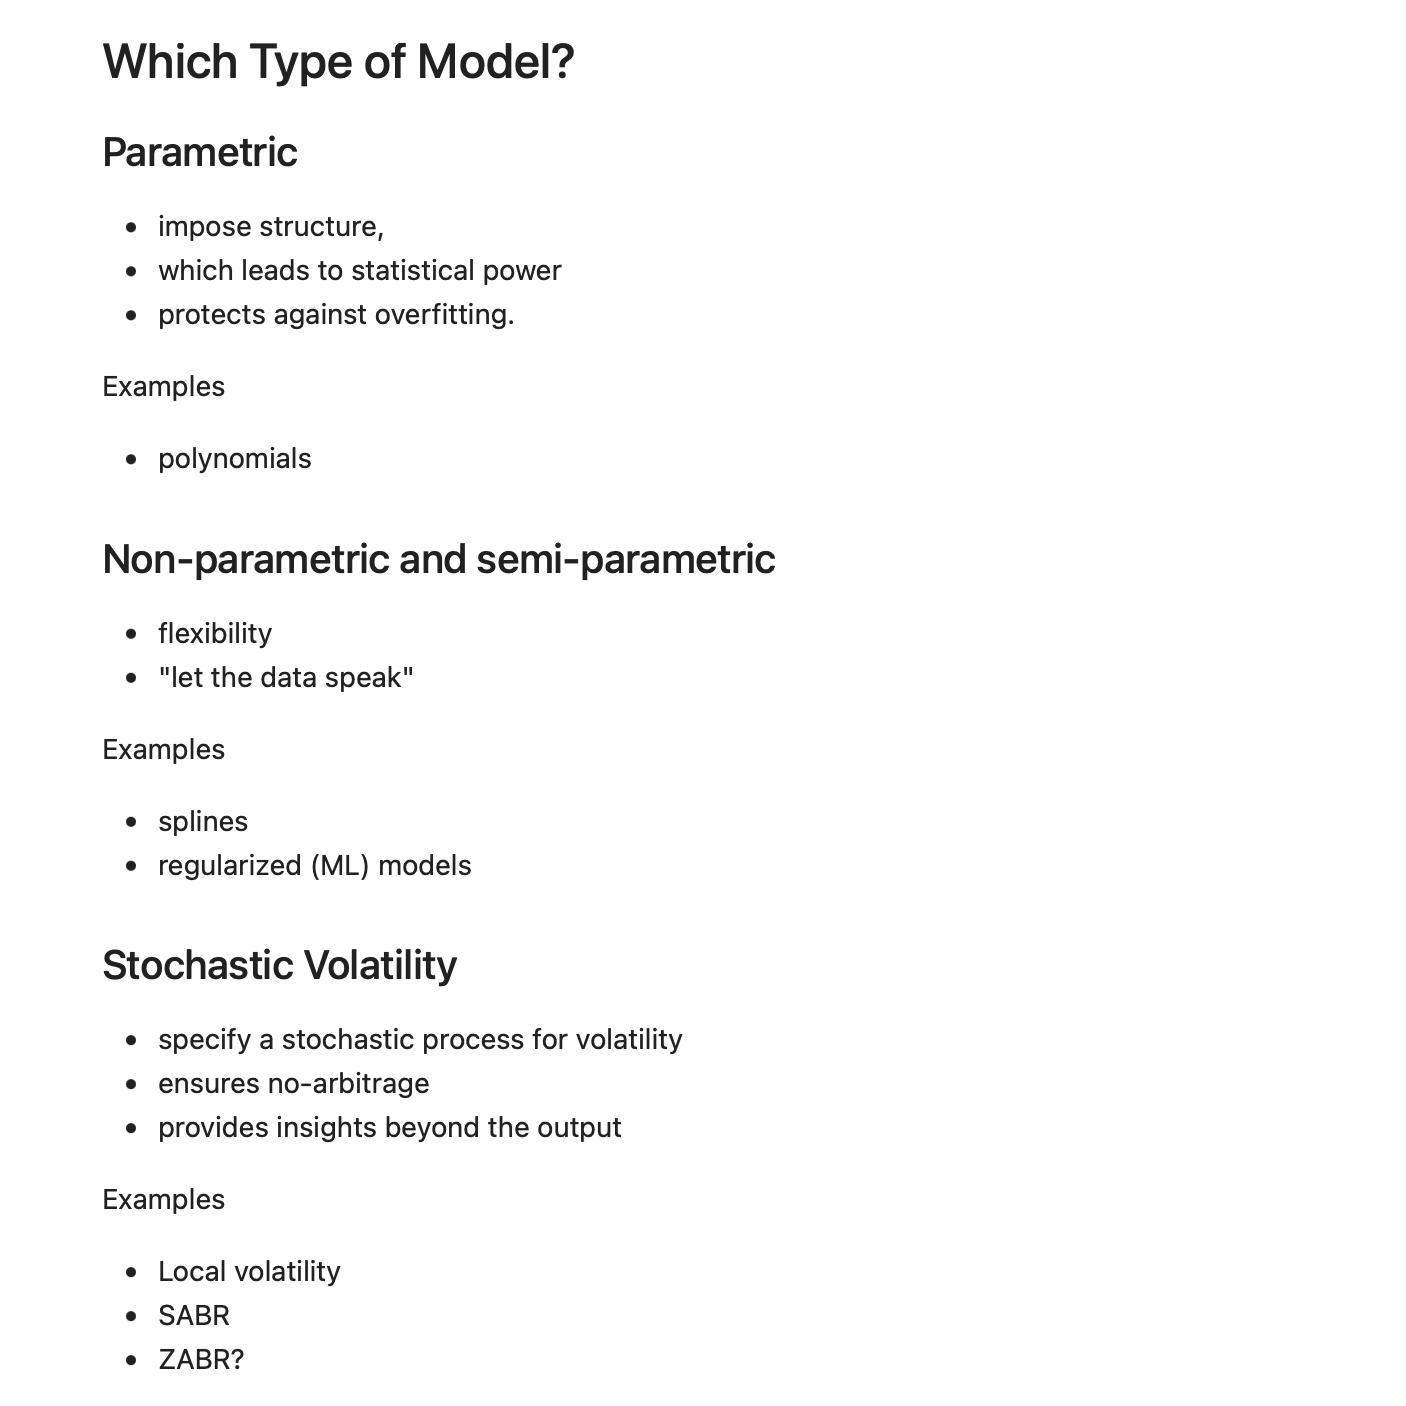

### SABR

## The Model

Suppose the underlying is the forward process, $F$.
* Typically using forwards or futures, as fitting with Black's model.

Under the **forward measure**, this process has no drift!
* So no "$dt$" term in the stochastic differential.
$$dF = \sigma F^{\beta}\dwF$$

Here, $\dwF$ is simply a pure Brownian motion as usual in these equations.
* The superscript is anticipating we will have a second such process.
* It is not an exponent.

### Role of Beta $\beta$
Note that $\beta$ is controlling whether this is
* lognormal: $\beta=1$
* normal: $\beta=0$
* CEV: $0<\beta<1$

Typically, this parameter is not estimated but is set according to the desired model.
* Could parameterize with a regression (in logs) but not typically done.

In interest-rate derivatives, it is typical to choose
* $\beta=0.5$

## Role of alpha $\alpha$

Alpha, sometimes denoted $\sigma_0$, is the initialized value of the stochastic volatility process.
* It is controlling the level of realized volatility.

In the formula below, 
* $\alpha$ is being written as $\sigma_0$ to emphasize this.

## Role of rho $\rho$
The process $\dwS$ is another Brownian motion, different than $\dwF$. 
* Remember the superscript is an identifier, not an exponent!
* They are not necessarily independent.

The parameter, $\rho$, governs the correlation between the two processes (shocks) $\dwF$ and $\dwS$.


## Role of "nu" $\nu$

Note that $\nu$ is a constant (parameter), and it is the "vol" of the volatility process.

### Benefit of SABR?

This function is a mess, but it is a closed-form solution!
* Traders may need to recompute the volatility curve every day / hour / second.
* A closed-form solution is attractive as it allows this frequent recalculation of the entire curve.
* Also SABR handles volatility skew pretty well. 

### Homework 4

### How to fit a SABR model?

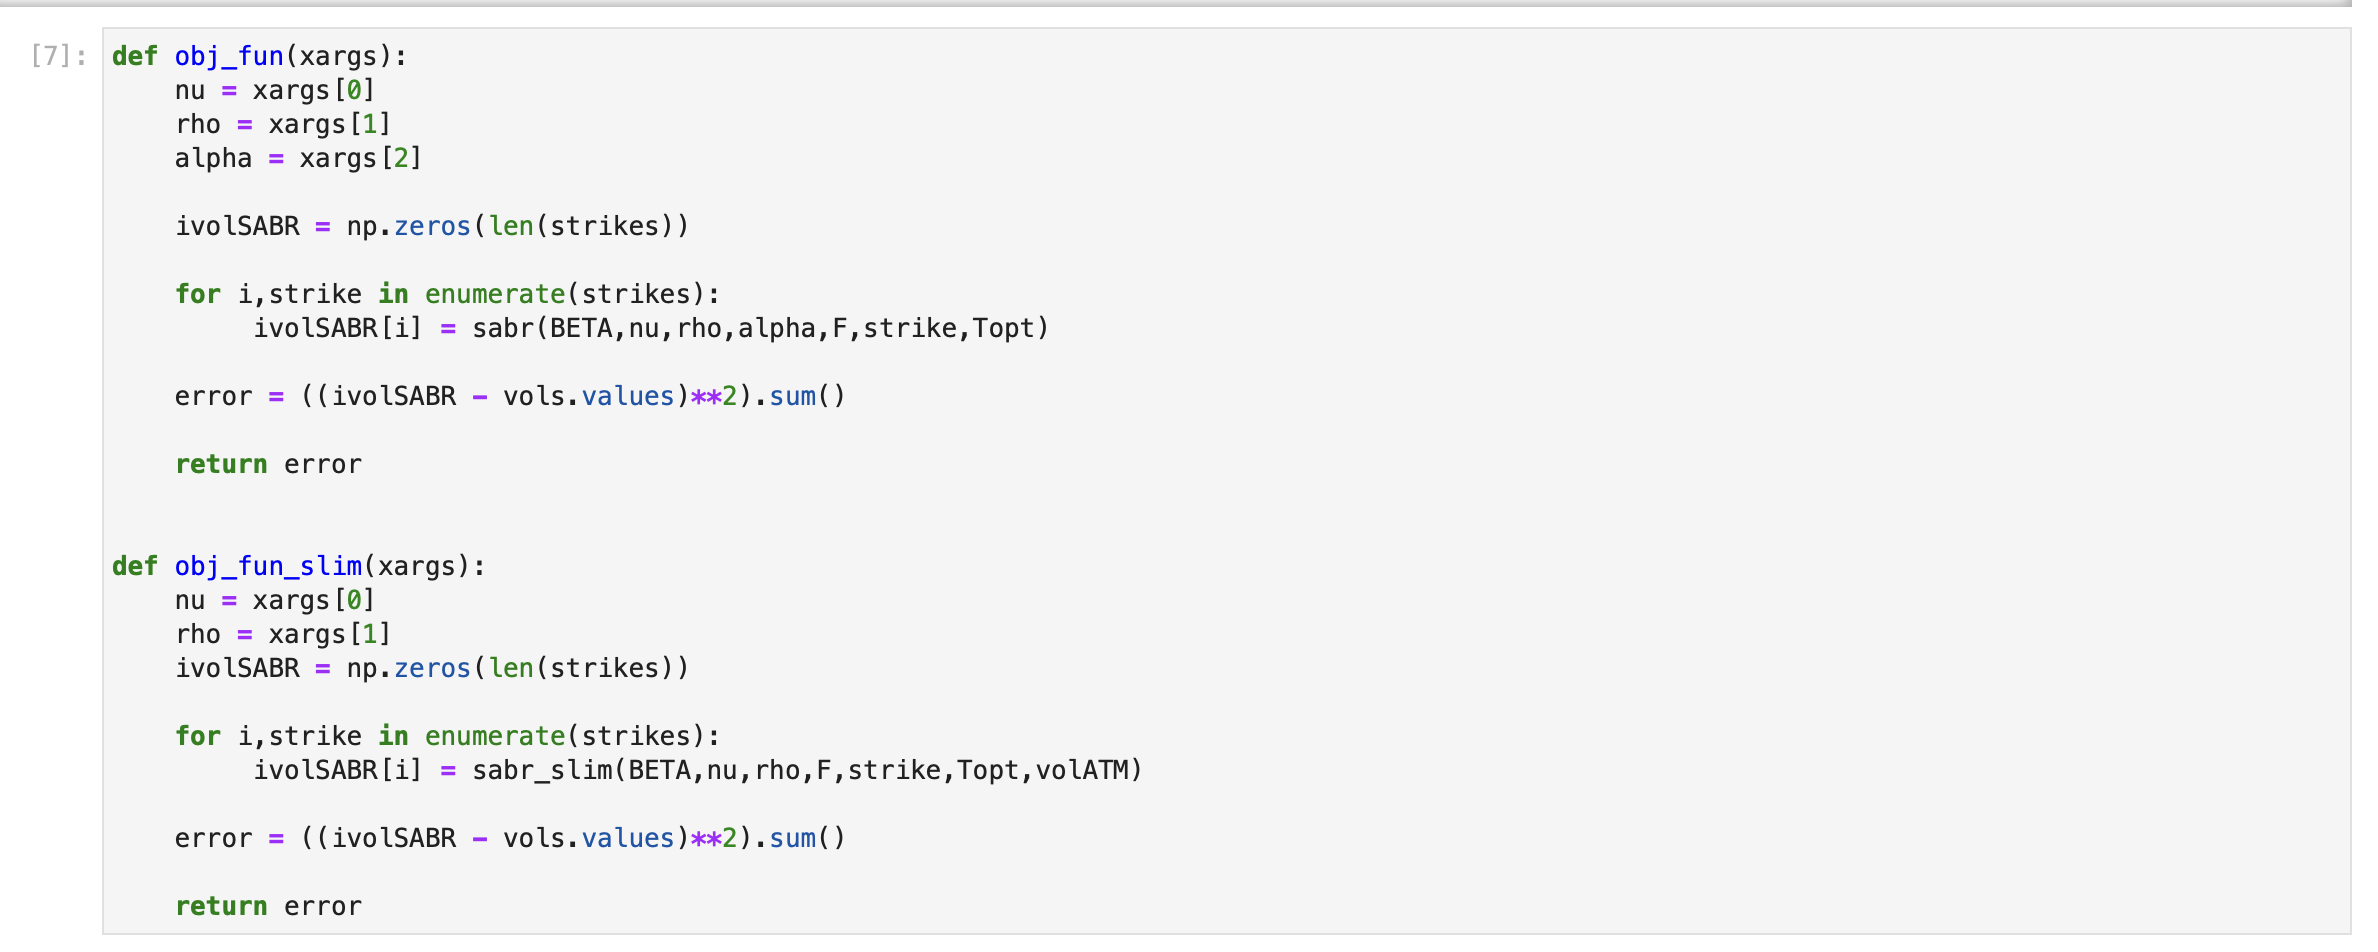

- These are the two minimization functions Mark use for homework 4. 
- For each strike, we refit the SABR and minimize the error with the real volatilies. 
- The difference here is that slim is used directly with the at the money volatilites, hence no need to estrimate alpha.

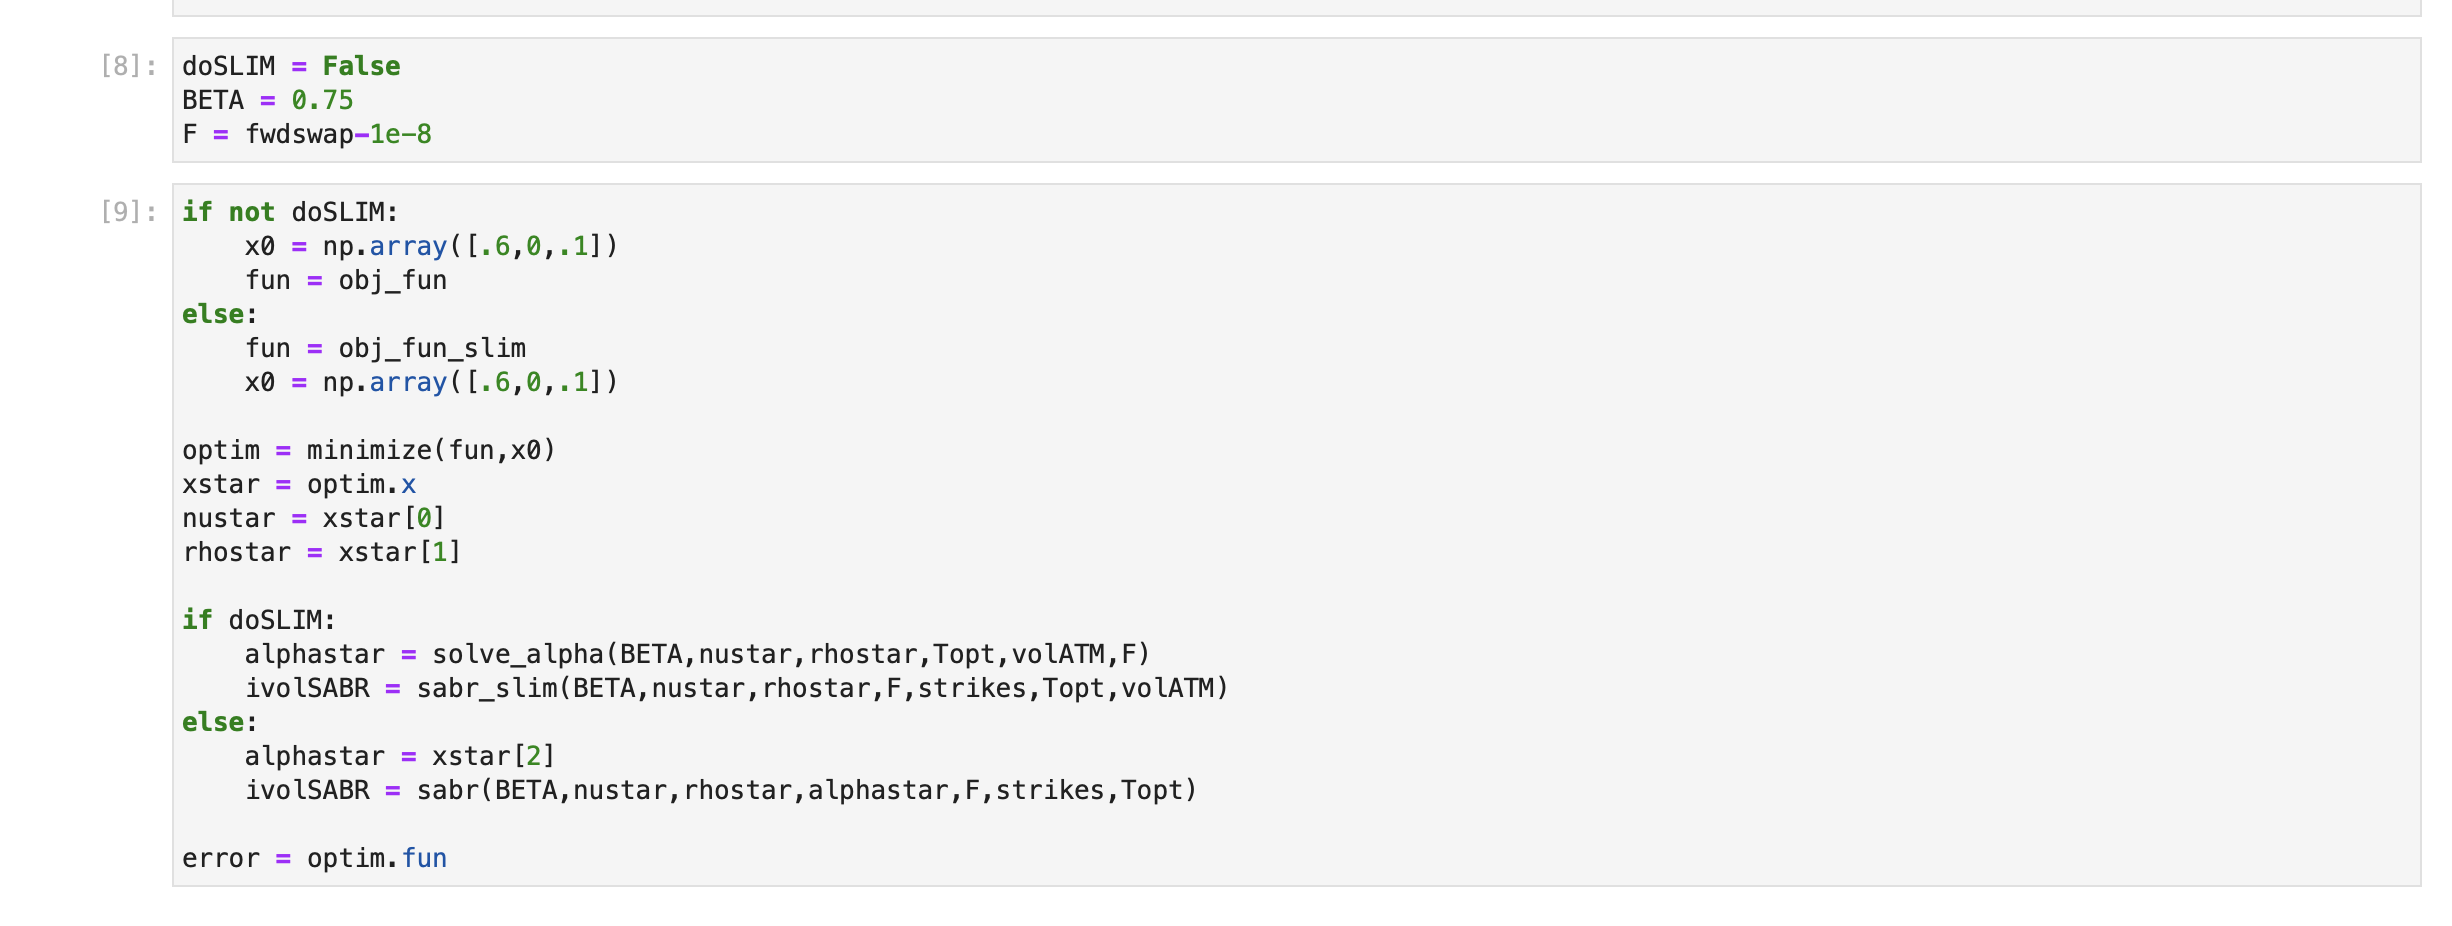

- After getting our estimates:

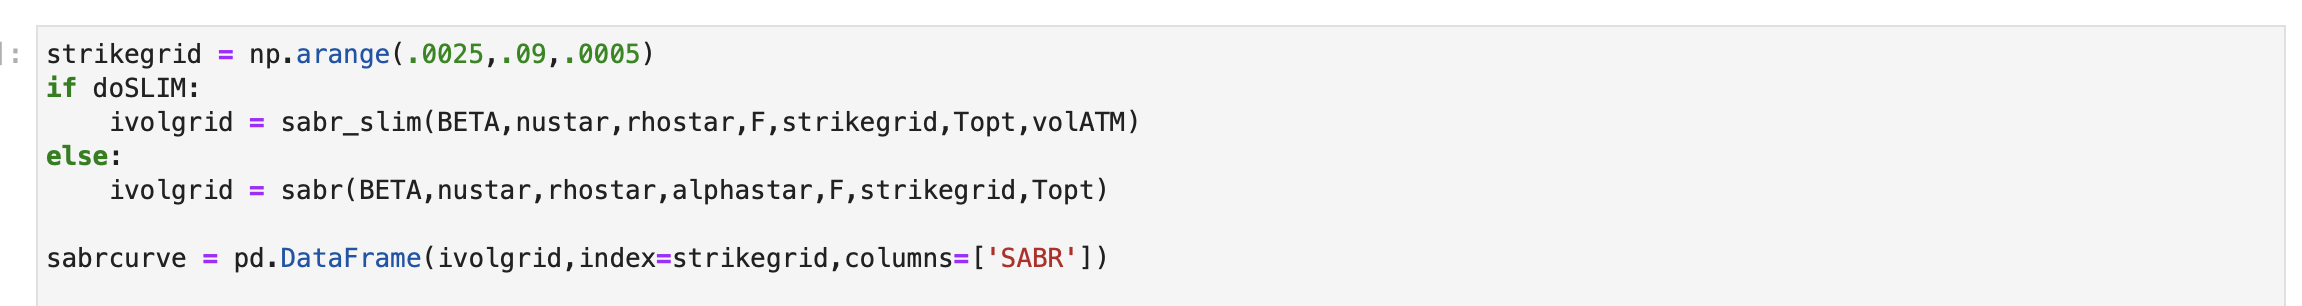

- We recreate the volatility grid with different strikes using those estimates. 